<a href="https://colab.research.google.com/github/MaryGloria23/The-R_programming-assignment/blob/main/LSTM_MODEL_FOR_TCR_pMHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the grammar of T-cell antigen recognition using fine-tuned large language models

## 1: Grammar of T-cell antigen **recognition**

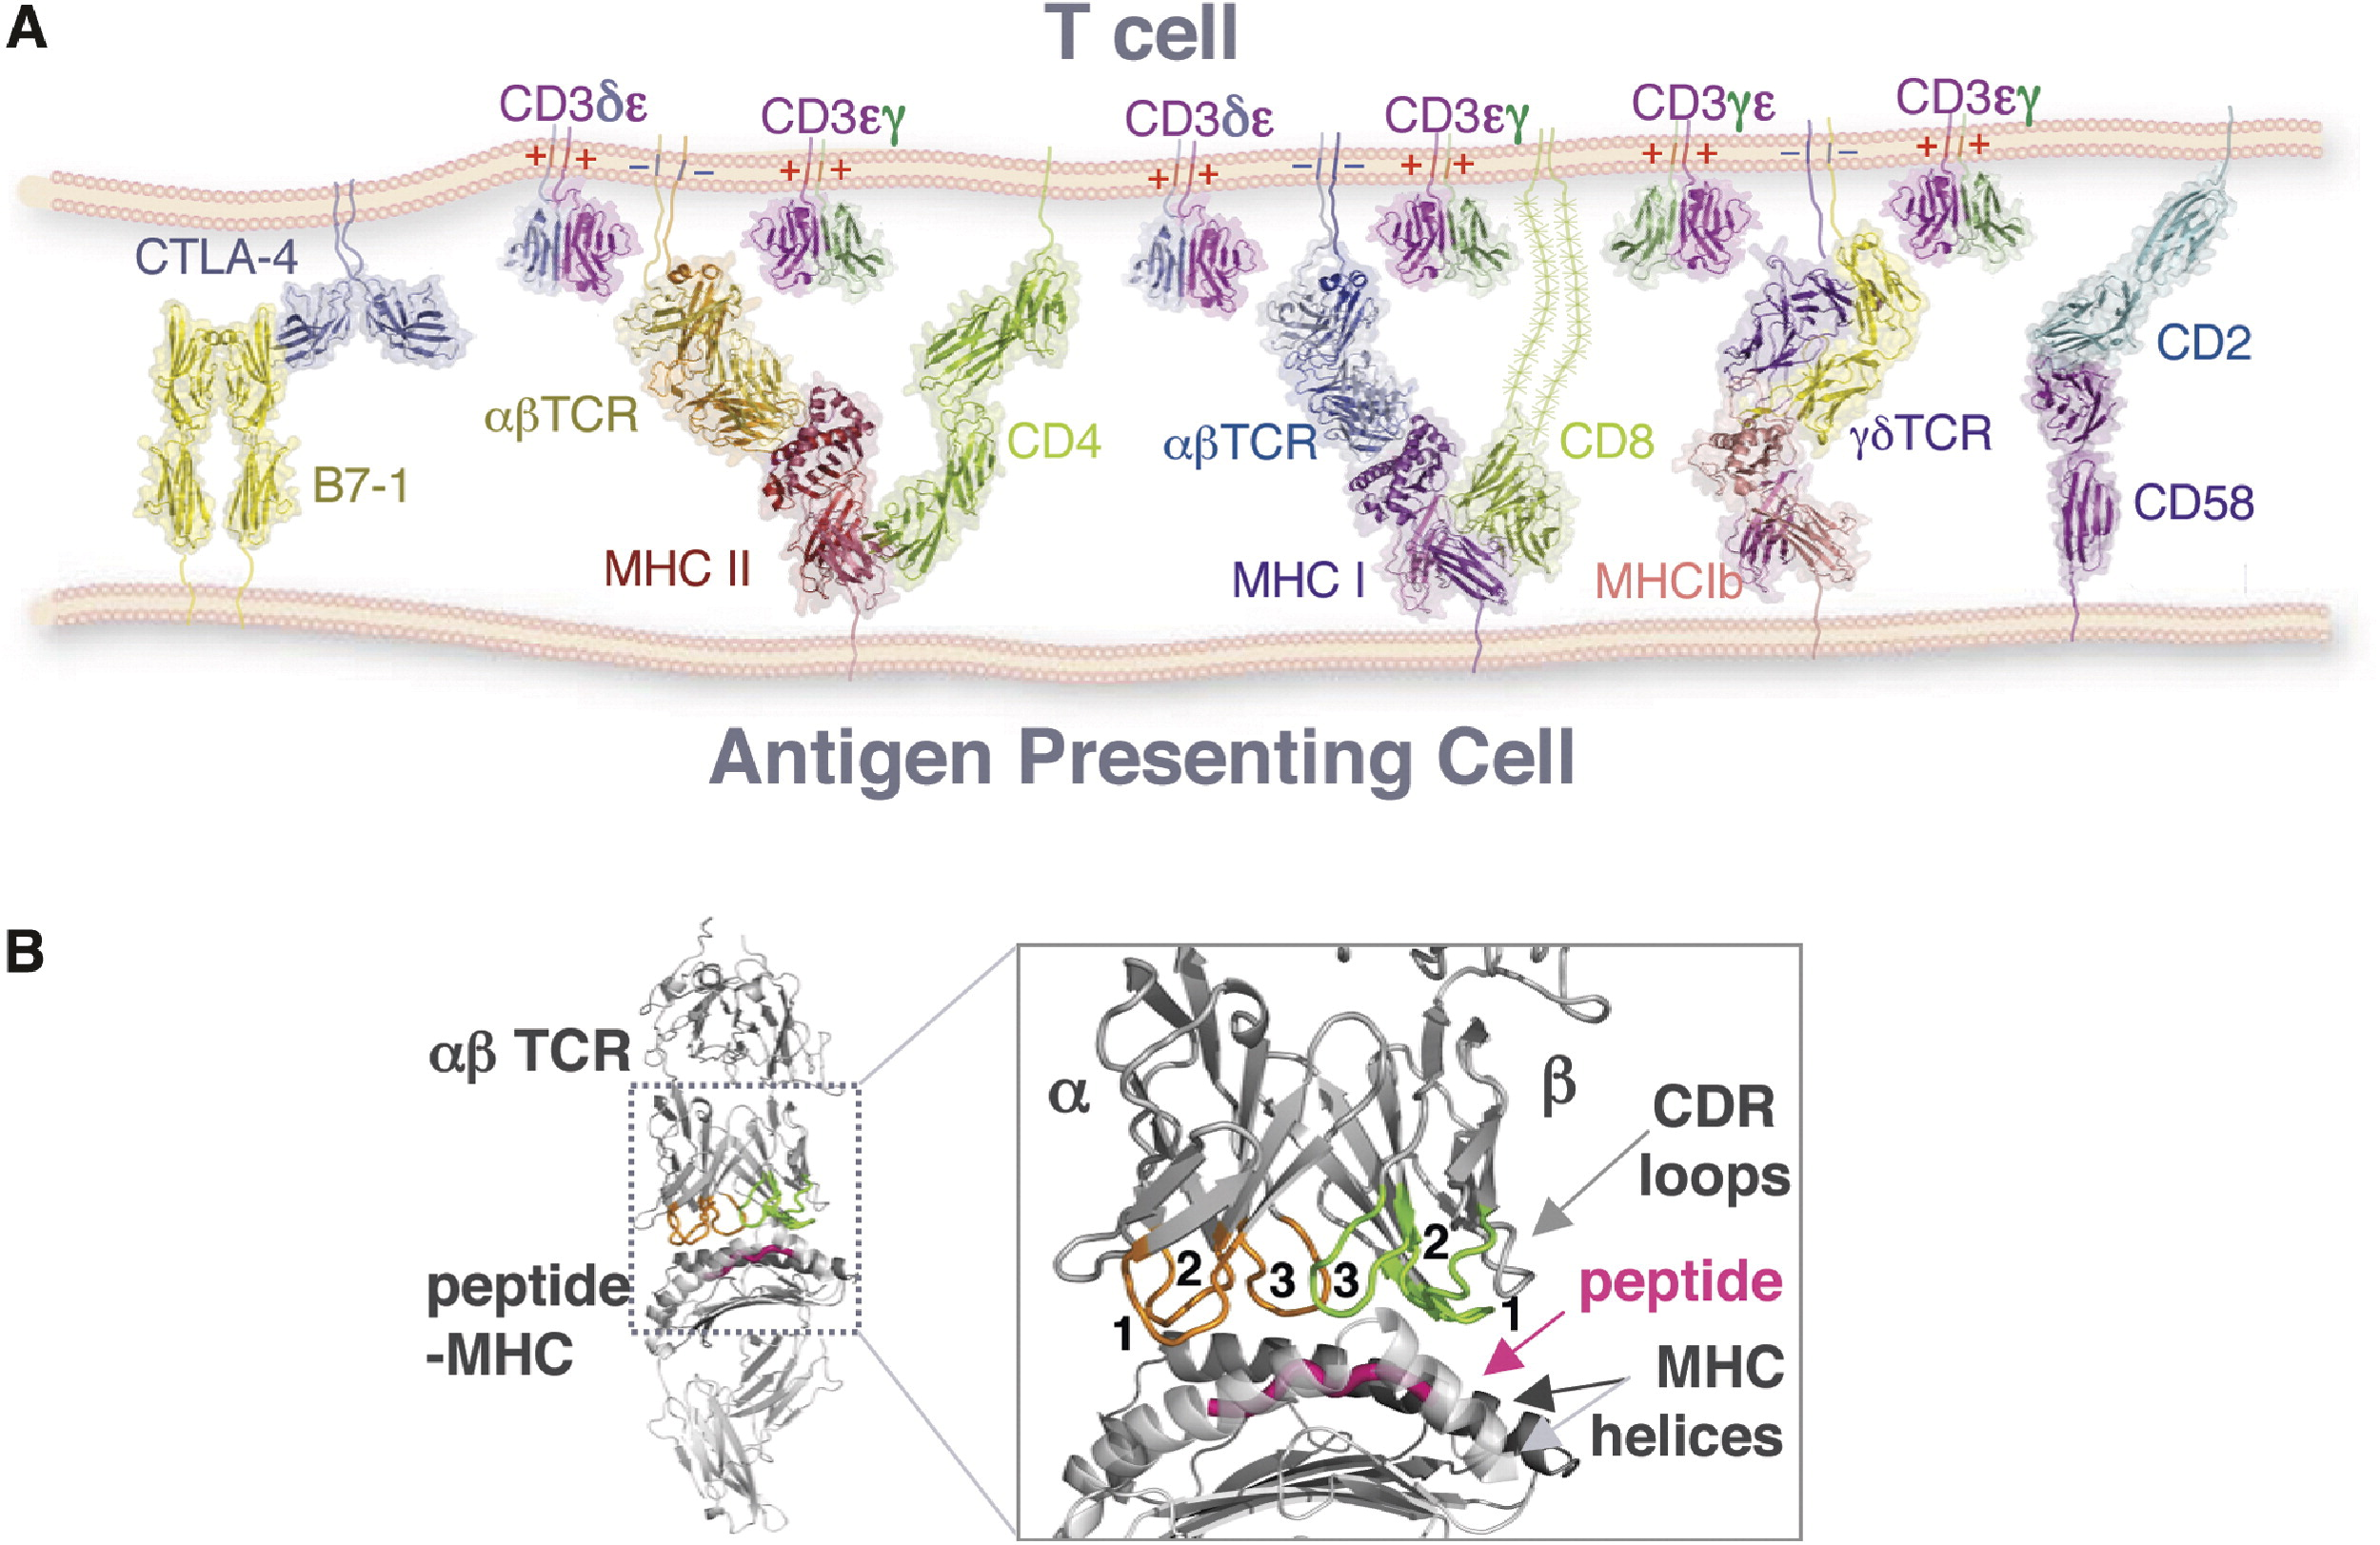

Figure from: [Garcia & Adams, Cell 2005](https://www.sciencedirect.com/science/article/pii/**S0092867405007452**)

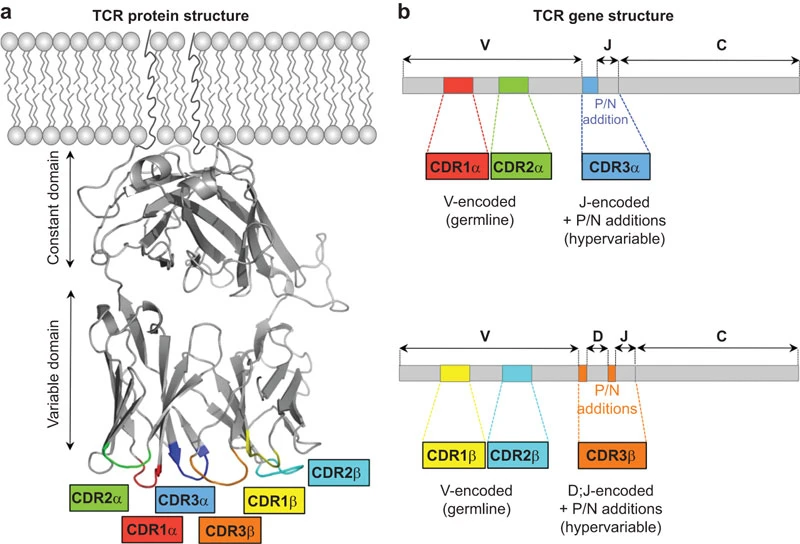

Figure from: [Attaf et al., Cell & Molecular Biology, 2015](https://www.nature.com/articles/cmi2014134)

In [1]:
from IPython.display import display, HTML

# 1. Define the data for all five protein chains
chains_data = [
    {
        "id": "A",
        "name": "Chain A: HLA class I histocompatibility antigen, B-35 alpha chain",
        "organism": "Homo sapiens (9606)",
        "sequence": "GSHSMRYFYTAMSRPGRGEPRFIAVGYVDDTQFVRFDSDAASPRTEPRAPWIEQEGPEYWDRNTQIFKTNTQTYRESLRNLRGYYNQSEAGSHIIQRMYGCDLGPDGRLLRGHDQSAYDGKDYIALNEDLSSWTAADTAAQITQRKWEAARVAEQLRAYLEGLCVEWLRRYLENGKETLQRADPPKTHVTHHPVSDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEP"
    },
    {
        "id": "B",
        "name": "Chain B: Beta-2-microglobulin",
        "organism": "Homo sapiens (9606)",
        "sequence": "IQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGERIEKVEHSDLSFSKDWSFYLLYYTEFTPTEKDEYACRVNHVTLSQPKIVKWDRDM"
    },
    {
        "id": "C",
        "name": "Chain C: HPVG peptide from Epstein-Barr nuclear antigen 1",
        "organism": "null",
        "sequence": "HPVGEADYFEY"
    },
    {
        "id": "D",
        "name": "Chain D: alpha chain of the TK3 TCR",
        "organism": "Homo sapiens (9606)",
        "sequence": "QVTQSPEALRLQEGESSSLNCSYTVSGLRGLFWYRQDPGKGPEFLFTLYSAGEEKEKERLKATLTKKESFLHITAPKPEDSATYLCAVQDLGTSGSRLTFGEGTQLTVNPNIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKCVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPS"
    },
    {
        "id": "E",
        "name": "Chain E: beta chain of the TK3 TCR",
        "organism": "Homo sapiens (9606)",
        "sequence": "DSGVTQTPKHLITATGQRVTLRCSPRSGDLSVYWYQQSLDQGLQFLIQYYNGEERAKGNILERFSAQQFPDLHSELNLSSLELGDSALYFCASSARSGELFFGEGSRLTVLEDLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFYPDHVELSWWVNGKEVHSGVCTDPQPLKEQPALNDSRYALSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRAD"
    }
]

# 2. Updated color map with a distinct color for the MHC Pocket
color_map = {
    'CDR1': '#E6194B',           # Red
    'CDR2': '#3CB44B',           # Green
    'CDR3': '#4363D8',           # Blue
    'CDR3-Conserved': '#F58231', # Orange
    'TCR_Peptide_Interface': '#911EB4', # Purple
    'TCR_MHC_Interface': '#42D4F4',     # Cyan
    'MHC_Pocket': '#FFD8B1',      # Apricot (New Color)
    'default': '#808080'         # Grey
}

# 3. Updated highlights dictionary to separate the MHC pocket
highlights = {
    'A': { # MHC Alpha Chain
        'MHC_Pocket': [7, 9, 24, 45, 59, 62, 63, 66, 67, 70, 73, 95, 97, 99, 143, 147, 156, 159, 163, 167, 171], # Residues touching peptide (pocket)
        'TCR_MHC_Interface': [65, 69, 150, 154, 155, 158] # Residues touching TCR
    },
     'C': { # Peptide Chain
        'TCR_Peptide_Interface': [4, 5, 6, 7, 8] # Central residues of peptide contacting the TCR/MHC
    },
    'D': { # TCR Alpha Chain
        'CDR1': [27, 32],
        'CDR2': [50, 55],
        'CDR3': [91, 101],
        'CDR3-Conserved': [90, 102, 103, 104, 105],
        'TCR_MHC_Interface': [27, 28, 51], # Contacts MHC
        'TCR_Peptide_Interface': [94, 95, 96] # Contacts Peptide
    },
    'E': { # TCR Beta Chain
        'CDR1': [27, 32],
        'CDR2': [50, 56],
        'CDR3': [93, 104],
        'CDR3-Conserved': [92, 105, 106, 107, 108],
        'TCR_MHC_Interface': [28, 48, 49], # Contacts MHC
        'TCR_Peptide_Interface': [51, 52, 95, 97, 98, 99] # Contacts Peptide
    }
}

# 4. Updated highlighting function
def highlight_sequence(sequence, chain_id):
    html = ""
    rules = highlights.get(chain_id, {})

    rule_sets = {}
    for region, res in rules.items():
        if isinstance(res, list) and len(res) == 2: # Range
            start, end = res
            rule_sets[region] = set(range(start, end + 1))
        else: # List of individual residues
            rule_sets[region] = set(res)

    for i, letter in enumerate(sequence):
        residue_num = i + 1
        color = color_map['default']

        # Check regions with contacts having priority to be colored over CDRs
        if residue_num in rule_sets.get('TCR_Peptide_Interface', set()):
            color = color_map['TCR_Peptide_Interface']
        elif residue_num in rule_sets.get('TCR_MHC_Interface', set()):
            color = color_map['TCR_MHC_Interface']
        elif residue_num in rule_sets.get('MHC_Pocket', set()): # New check for the pocket
            color = color_map['MHC_Pocket']
        elif residue_num in rule_sets.get('CDR3-Conserved', set()):
            color = color_map['CDR3-Conserved']
        elif residue_num in rule_sets.get('CDR3', set()):
            color = color_map['CDR3']
        elif residue_num in rule_sets.get('CDR2', set()):
            color = color_map['CDR2']
        elif residue_num in rule_sets.get('CDR1', set()):
            color = color_map['CDR1']

        html += f'<span style="color:{color}; font-weight:bold;">{letter}</span>'
    return html

# 5. Generate a legend for the colors
legend_html = "<b>Legend:</b> "
for region, color in color_map.items():
    if region != 'default':
        legend_html += f'<span style="color:{color}; font-weight:bold; margin-left: 15px;">■ {region.replace("_", " ")}</span>'
display(HTML(legend_html + "<hr>"))

# 6. Loop through the data and display it
for chain in chains_data:
    organism_text = f"<i>{chain['organism']}</i>" if chain['organism'] != 'null' else "Not specified"
    highlighted_seq = highlight_sequence(chain['sequence'], chain['id'])

    final_html = f"""
    <div style="font-family: sans-serif; line-height: 1.6;">
        <h3>{chain['name']}</h3>
        <p><b>Organism:</b> {organism_text}</p>
        <p style="word-wrap: break-word; font-family: monospace; font-size: 14px;">
            {highlighted_seq}
        </p>
    </div>
    <hr>
    """
    display(HTML(final_html))

## Modeling sequences as language

Four main architectures being evaluated:

1. LSTM (Long Short Term Memory):

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Mb_L_slY9rjMr8-IADHvwg.png" alt="LSTM" width="1400">

2. Transformers / BERT / GPT

<img src="https://towardsdatascience.com/wp-content/uploads/2024/05/1Qww2aaIdqrWVeNmo3AS0ZQ-1536x985.png" alt="Transformers" width="1400">

# 2: Modeling TCR-peptide-MHC interactions

In [2]:
# @title 2.1: Install Dependencies
# Use -q to make the installation less verbose
!pip install -q torch transformers datasets tokenizers sentencepiece pandas
              #-q: Makes the output less verbose (quiet mode)
              #torch: PyTorch, a deep learning framework.
              #transformers: Hugging Face's library for pre-trained NLP models.
              #datasets: Hugging Face's dataset library for loading and processing datasets.
              #tokenizers: Fast tokenization library used with transformers.
              #sentencepiece: Tokenizer used for models like T5 and BERT.
              #pandas: Data manipulation and analysis library.

# For the LSTM model with TensorFlow
!pip install -q tensorflow
              #Installs TensorFlow, another popular deep learning framework.
              #Useful if you're building or training LSTM (Long Short-Term Memory) models.

!wget https://github.com/antigenomics/vdjdb-db/releases/download/pyvdjdb-2025-02-21/vdjdb-2025-02-21.zip
!unzip vdjdb-2025-02-21.zip

--2025-09-24 13:08:03--  https://github.com/antigenomics/vdjdb-db/releases/download/pyvdjdb-2025-02-21/vdjdb-2025-02-21.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/49149680/fd240948-34d6-49ef-99da-4035aedf4cd8?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-24T13%3A57%3A11Z&rscd=attachment%3B+filename%3Dvdjdb-2025-02-21.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-24T12%3A56%3A40Z&ske=2025-09-24T13%3A57%3A11Z&sks=b&skv=2018-11-09&sig=RNoA5PrxJK57gTCH%2B7bLJmmFSr6J%2Fp3METufEXHysrg%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1ODcxOTU4MywibmJmIjoxNzU4NzE5MjgzLCJwYXRoIjoicmVsZWF

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [4]:
# @title 2.2: Download and Prepare the VDJdb Dataset (Corrected)
import pandas as pd
import requests
import zipfile
import io
import os

vdj_db = "vdjdb-2025-02-21/vdjdb.slim.txt"
# Load the data into a pandas DataFrame
df = pd.read_csv(vdj_db, sep='\t')

# We are interested in the amino acid sequence of the CDR3 region
# Let's filter for human TRB (T-cell Receptor Beta) chains for consistency
df_human_trb = df[(df['gene'] == 'TRB') & (df['species'] == 'HomoSapiens')]

sequences = df_human_trb['cdr3'].tolist()[:50] #Extracts the CDR3 region. Converts the column to a list and selects the first 50 sequences.
sequences

large_sequence = df_human_trb['cdr3'].tolist()[:5000] #Extracts the first 5000 CDR3 sequences for more extensive analysis or model training


test = df_human_trb['cdr3'].tolist()[-50:] #Extracts the last 50 sequences from the filtered dataset. Useful for testing or validation purposes.

In [5]:
df

,gene,cdr3,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v.segm,j.segm,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score,j.start,v.end
0,TRA,CAAAAGNTGKLIF,HomoSapiens,SLFFSAQPFEITAST,APOB,HomoSapiens,44680,TRAV13-1*01,TRAJ37*01,HLA-DRA*01:01:01,HLA-DRB1*07:01,MHCII,PMID:35990517,2,5,3
1,TRA,CAAAAGNTGKLIF,MusMusculus,HGIRNASFI,M45,MCMV,3387,TRAV5N-4*01,TRAJ37*01,H-2Db,B2M,MHCI,PMID:28636592,3,5,3
2,TRA,CAAAAPSSDKVIF,HomoSapiens,RAKFKQLL,BZLF1,EBV,40451,TRAV13-1*01,TRAJ50*01,HLA-B*08:01,B2M,MHCI,PMID:34811538,1,9,3
3,TRA,CAAAASGGSYIPTF,HomoSapiens,EPLPQGQLTAY,BZLF1,EBV,38479,TRAV1-2*01,TRAJ6*01,HLA-B*35:01,B2M,MHCI,PMID:16148129,2,4,2
4,TRA,CAAAATDLRF,HomoSapiens,VSATAGTTVY,GAD2,HomoSapiens,41248,TRAV27*01,TRAJ43*01,HLA-A*01:01,B2M,MHCI,PMID:34811538,1,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85003,TRB,CVSRSLVSTGELFF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,HIV-1,0,TRBV2*01,TRBJ2-2*01,HLA-DRA*01:01,HLA-DRB5*01:01,MHCII,PMID:27111229,1,8,-1
85004,TRB,CVSSKGRMDFYEQYF,HomoSapiens,QYIKWPWYI,Spike,SARS-CoV-2,0,TRBV15*01,TRBJ2-7*01,HLA-A*24:01,B2M,MHCI,https://doi.org/10.1016/j.xcrm.2023.101017,0,10,-1
85005,TRB,CVSTQGAEVFF,MusMusculus,SSLENFRAYV,PA,InfluenzaA,3422,TRBV29*01,TRBJ1-1*01,H-2Db,B2M,MHCI,PMID:28636592,0,7,-1
85006,TRB,CVSVGRSGYTF,HomoSapiens,TTDPSFLGRY,ORF1ab,SARS-CoV-2,17346,TRBV7-9*01,TRBJ1-2*01,HLA-A*01:01,B2M,MHCI,PMID:35750048,2,7,-1


In [6]:
test

['CSVWSGDSYNEQFF',
 'CSVWSSGTYEQYF',
 'CSVWTAEAFF',
 'CSVWTAISSGANVLTF',
 'CSVWTGEKHEAFF',
 'CSVWTPRSQTYEQYF',
 'CSVWVAGENTEAFF',
 'CSVWVGREQETQYF',
 'CSVYAGYGYTF',
 'CSVYERERHNEQFF',
 'CSVYLLEAFF',
 'CSVYPGQNNEQFF',
 'CSVYPSGDYNEQFF',
 'CSVYQYDVLTFSGNTIYF',
 'CSVYRAERGSYGYTF',
 'CSVYREIPEAFF',
 'CSVYSGMDTQYF',
 'CSYAAGVNEQFF',
 'CSYLADTQYF',
 'CSYRGLGTEAFF',
 'CSYSAGEDQPQHF',
 'CSYSAGEDQPQHF',
 'CSYSPGQGRNEQFF',
 'CTAEAGNTEAFF',
 'CTIGRTNTEAFF',
 'CTNPGDPCYNEQFF',
 'CTRAYNQPQHF',
 'CTSRAGAGDTQYF',
 'CTSRLDPGFLEQYF',
 'CTSSQRGGYNEQFF',
 'CTSTRGSTDTQYF',
 'CTSVPAVTPTVNEQFF',
 'CTSVPAVTQPSAVKETQYF',
 'CTSVPAVTRHRQETQYF',
 'CTSVPAVTSGSGSPLHF',
 'CTSVPAVTVNFYGYTF',
 'CTTGDGMNTEAFF',
 'CTTSSGEADTQYF',
 'CVAHGTANEKLFF',
 'CVPGSYNEQFF',
 'CVPVGSGGVLDTQYF',
 'CVRGEANTGELFF',
 'CVRQDRNTGELFF',
 'CVSDSNTGELFF',
 'CVSGWGSQPQHF',
 'CVSRSGAEAFF',
 'CVSRSLVSTGELFF',
 'CVSSKGRMDFYEQYF',
 'CVSVGRSGYTF',
 'CWGNTEAFF']

In [7]:
df_human_trb

,gene,cdr3,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v.segm,j.segm,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score,j.start,v.end
34020,TRB,CAAADEEIGNQPQHF,HomoSapiens,ATDALMTGY,NS3,HCV,0,TRBV10-3*01,TRBJ1-5*01,HLA-A*01:01,B2M,MHCI,PMID:21160049,1,9,2
34021,TRB,CAAAERNTGELFF,HomoSapiens,YLQPRTFLL,Spike,SARS-CoV-2,0,TRBV28*01,TRBJ2-2*01,HLA-A*02,B2M,MHCI,https://github.com/antigenomics/vdjdb-db/issue...,2,6,2
34022,TRB,CAAAGTASTDTQYF,HomoSapiens,RAKFKQLL,BZLF1,EBV,"39927,39975",TRBV10-3*01,TRBJ2-3*01,HLA-B*08:01,B2M,MHCI,PMID:34811538,2,7,2
34023,TRB,CAAATGLYGYTF,HomoSapiens,GILGFVFTL,M,InfluenzaA,0,TRBV19*01,TRBJ1-2*01,HLA-A*02:01,B2M,MHCI,PMID:34811538,2,7,2
34025,TRB,CAACPGTENTGELFF,HomoSapiens,KLVALGINAV,NS3,HCV,42597,TRBV10-2*01,TRBJ2-2*01,HLA-A*02:01,B2M,MHCI,PMID:34811538,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85002,TRB,CVSRSGAEAFF,HomoSapiens,GILGFVFTL,M,InfluenzaA,0,TRBV19*01,TRBJ1-1*01,HLA-A*02,B2M,MHCI,PMID:28423320,2,7,-1
85003,TRB,CVSRSLVSTGELFF,HomoSapiens,FRDYVDRFYKTLRAEQASQE,Gag,HIV-1,0,TRBV2*01,TRBJ2-2*01,HLA-DRA*01:01,HLA-DRB5*01:01,MHCII,PMID:27111229,1,8,-1
85004,TRB,CVSSKGRMDFYEQYF,HomoSapiens,QYIKWPWYI,Spike,SARS-CoV-2,0,TRBV15*01,TRBJ2-7*01,HLA-A*24:01,B2M,MHCI,https://doi.org/10.1016/j.xcrm.2023.101017,0,10,-1
85006,TRB,CVSVGRSGYTF,HomoSapiens,TTDPSFLGRY,ORF1ab,SARS-CoV-2,17346,TRBV7-9*01,TRBJ1-2*01,HLA-A*01:01,B2M,MHCI,PMID:35750048,2,7,-1


In [8]:
df_selected = df_human_trb[['cdr3', 'antigen.epitope', 'mhc.a']]
df_selected

,cdr3,antigen.epitope,mhc.a
34020,CAAADEEIGNQPQHF,ATDALMTGY,HLA-A*01:01
34021,CAAAERNTGELFF,YLQPRTFLL,HLA-A*02
34022,CAAAGTASTDTQYF,RAKFKQLL,HLA-B*08:01
34023,CAAATGLYGYTF,GILGFVFTL,HLA-A*02:01
34025,CAACPGTENTGELFF,KLVALGINAV,HLA-A*02:01
...,...,...,...
85002,CVSRSGAEAFF,GILGFVFTL,HLA-A*02
85003,CVSRSLVSTGELFF,FRDYVDRFYKTLRAEQASQE,HLA-DRA*01:01
85004,CVSSKGRMDFYEQYF,QYIKWPWYI,HLA-A*24:01
85006,CVSVGRSGYTF,TTDPSFLGRY,HLA-A*01:01


In [9]:
!wget ftp://ftp.ebi.ac.uk:21/pub/databases/ipd/imgt/hla/hla_prot.fasta

--2025-09-24 13:09:08--  ftp://ftp.ebi.ac.uk/pub/databases/ipd/imgt/hla/hla_prot.fasta
           => ‘hla_prot.fasta’
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/databases/ipd/imgt/hla ... done.
==> SIZE hla_prot.fasta ... 13472583
==> PASV ... done.    ==> RETR hla_prot.fasta ... done.
Length: 13472583 (13M) (unauthoritative)

hla_prot.fasta      100%[===================>]  12.85M  1.05MB/s    in 13s     

2025-09-24 13:09:23 (1017 KB/s) - ‘hla_prot.fasta’ saved [13472583]



In [10]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.2 MB/s eta 0:00:00


In [11]:
from Bio import SeqIO

# Create a dictionary: allele (e.g., A*01:01) → protein sequence
hla_dict = {}

for record in SeqIO.parse("hla_prot.fasta", "fasta"):
    header = record.description
    sequence = str(record.seq)

    # Extract allele name from header (e.g., A*01:01:01:01 → A*01:01)
    parts = header.split()
    full_allele = parts[1]  # e.g., A*01:01:01:01
    short_allele = ":".join(full_allele.split(":")[:2])  # e.g., A*01:01

    hla_dict[short_allele] = sequence
# Replace mhc.a with the corresponding protein sequence
#df_selected['mhc.a_protein'] = df_selected['mhc.a'].map(hla_dict)
df_selected['mhc.a_protein'] = df_selected['mhc.a'].str.replace("HLA-", "").map(hla_dict)

#df_selected = df_selected.drop(columns=['mhc.a'])


/tmp/ipython-input-2882553325.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['mhc.a_protein'] = df_selected['mhc.a'].str.replace("HLA-", "").map(hla_dict)


In [12]:
allele = "HLA-B*57:01"
short_allele = allele.replace("HLA-", "")  # → A*01:01
hla_dict[short_allele][:60]  # First 60 characters of the sequence

'MRVTAPRTVLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRFIAVGYVDDTQFVRF'

In [13]:
df_selected

,cdr3,antigen.epitope,mhc.a,mhc.a_protein
34020,CAAADEEIGNQPQHF,ATDALMTGY,HLA-A*01:01,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
34021,CAAAERNTGELFF,YLQPRTFLL,HLA-A*02,NaN
34022,CAAAGTASTDTQYF,RAKFKQLL,HLA-B*08:01,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFDTAMSRPGRGEPRF...
34023,CAAATGLYGYTF,GILGFVFTL,HLA-A*02:01,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
34025,CAACPGTENTGELFF,KLVALGINAV,HLA-A*02:01,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
...,...,...,...,...
85002,CVSRSGAEAFF,GILGFVFTL,HLA-A*02,NaN
85003,CVSRSLVSTGELFF,FRDYVDRFYKTLRAEQASQE,HLA-DRA*01:01,MAISGVPVLGFFIIAVLMSAQESWAIKEEHVIIQAEFYLNPDQSGE...
85004,CVSSKGRMDFYEQYF,QYIKWPWYI,HLA-A*24:01,NaN
85006,CVSVGRSGYTF,TTDPSFLGRY,HLA-A*01:01,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...


In [14]:
from Bio import SeqIO

target_allele = "DRA*01:01:01"

for record in SeqIO.parse("hla_prot.fasta", "fasta"):
    header = record.description
    sequence = str(record.seq)

    # Extract allele from header
    parts = header.split()
    full_allele = parts[1]  # e.g., A*02:01:01:01
    short_allele = ":".join(full_allele.split(":")[:2])  # → A*02:01

    if short_allele == target_allele:
        print(f"Found: {short_allele}")
        print(f"Header: {header}")
        print(f"Sequence (first 60 aa): {sequence[:60]}")
        break
else:
    print(f"{target_allele} not found in FASTA file.")


DRA*01:01:01 not found in FASTA file.


In [15]:
df_selected = df_selected.drop(columns=['mhc.a'])
df_selected

,cdr3,antigen.epitope,mhc.a_protein
34020,CAAADEEIGNQPQHF,ATDALMTGY,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
34021,CAAAERNTGELFF,YLQPRTFLL,NaN
34022,CAAAGTASTDTQYF,RAKFKQLL,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFDTAMSRPGRGEPRF...
34023,CAAATGLYGYTF,GILGFVFTL,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
34025,CAACPGTENTGELFF,KLVALGINAV,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
...,...,...,...
85002,CVSRSGAEAFF,GILGFVFTL,NaN
85003,CVSRSLVSTGELFF,FRDYVDRFYKTLRAEQASQE,MAISGVPVLGFFIIAVLMSAQESWAIKEEHVIIQAEFYLNPDQSGE...
85004,CVSSKGRMDFYEQYF,QYIKWPWYI,NaN
85006,CVSVGRSGYTF,TTDPSFLGRY,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...


In [16]:
df_clean = df_selected.dropna(subset=['mhc.a_protein'])
df_clean

,cdr3,antigen.epitope,mhc.a_protein
34020,CAAADEEIGNQPQHF,ATDALMTGY,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
34022,CAAAGTASTDTQYF,RAKFKQLL,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFDTAMSRPGRGEPRF...
34023,CAAATGLYGYTF,GILGFVFTL,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
34025,CAACPGTENTGELFF,KLVALGINAV,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
34026,CAAEDPEWGAEAFF,KLGGALQAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
...,...,...,...
85000,CVSDSNTGELFF,VVTGVLVYL,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...
85001,CVSGWGSQPQHF,AVFDRKSDAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...
85003,CVSRSLVSTGELFF,FRDYVDRFYKTLRAEQASQE,MAISGVPVLGFFIIAVLMSAQESWAIKEEHVIIQAEFYLNPDQSGE...
85006,CVSVGRSGYTF,TTDPSFLGRY,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...


In [17]:
from sklearn.model_selection import train_test_split

# Step 2: Split into 80% train and 20% temp (val + test)
df_train, df_temp = train_test_split(df_clean, test_size=0.2, random_state=42)

# Step 3: Split temp into 10% val and 10% test
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

print(f"Train size: {len(df_train)}")
print(f"Validation size: {len(df_val)}")
print(f"Test size: {len(df_test)}")


Train size: 28140
Validation size: 3517
Test size: 3518


In [18]:
def concatenate_sequences(row):
    return row['cdr3'] + '|' + row['antigen.epitope'] + '|' + row['mhc.a_protein']

df_train['input_seq'] = df_train.apply(concatenate_sequences, axis=1)
df_val['input_seq'] = df_val.apply(concatenate_sequences, axis=1)
df_test['input_seq'] = df_test.apply(concatenate_sequences, axis=1)

In [19]:
df_train

,cdr3,antigen.epitope,mhc.a_protein,input_seq
65610,CASSQGGQGKGGYTF,KLGGALQAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CASSQGGQGKGGYTF|KLGGALQAK|MAVMAPRTLLLLLSGALALT...
59156,CASSNYRPFSTDTQYF,GILGFVFTL,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CASSNYRPFSTDTQYF|GILGFVFTL|MAVMAPRTLVLLLSGALAL...
83321,CSGVLAPSYNEQFF,KLGGALQAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CSGVLAPSYNEQFF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQ...
51294,CASSLDWGNTIYF,KLGGALQAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CASSLDWGNTIYF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQT...
45294,CASSFRAGNEQFF,GILGFVFTL,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CASSFRAGNEQFF|GILGFVFTL|MAVMAPRTLVLLLSGALALTQT...
...,...,...,...,...
58634,CASSMGPTSGGPTDTQYF,RAKFKQLL,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFDTAMSRPGRGEPRF...,CASSMGPTSGGPTDTQYF|RAKFKQLL|MLVMAPRTVLLLLSAALA...
43422,CASSERGLEGYTF,KLGGALQAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CASSERGLEGYTF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQT...
50749,CASSLAVGASPQHF,RAKFKQLL,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFDTAMSRPGRGEPRF...,CASSLAVGASPQHF|RAKFKQLL|MLVMAPRTVLLLLSAALALTET...
35245,CARGGKGDTAEAFF,AVFDRKSDAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,CARGGKGDTAEAFF|AVFDRKSDAK|MAVMAPRTLLLLLSGALALT...


In [20]:
#all_chars = sorted(list(set("".join(df_train['input_seq']))))
#PAD_TOKEN = "<PAD>"
#all_chars.append(PAD_TOKEN)

#char_to_int = {char: i for i, char in enumerate(all_chars)}
#int_to_char = {i: char for char, i in char_to_int.items()}
#PAD_IDX = char_to_int[PAD_TOKEN]
#vocab_size = len(all_chars)

In [21]:
# Pick a sample input sequence
#sample_seq = df_train['input_seq'].iloc[0]
#print("Original sequence:", sample_seq)

# Encode the sequence
#encoded_seq = [char_to_int[c] for c in sample_seq]
#print("Encoded sequence:", encoded_seq)

# Decode it back
#decoded_seq = "".join([int_to_char[i] for i in encoded_seq])
#print("Decoded sequence:", decoded_seq)

# Check if original and decoded match
#print("Match:", sample_seq == decoded_seq)


TRIAL: SPLIT THE INPUT

In [22]:
import pandas as pd

# Function to truncate MHC to first 50 chars
def make_input_seq(row):
    cdr3 = row['cdr3']
    epitope = row['antigen.epitope']
    mhc50 = row['mhc.a_protein'][:50]  # first 50 characters
    return f"{cdr3}|{epitope}|{mhc50}"

# Create a new column with truncated sequences
df_train['input_seq_subset'] = df_train.apply(make_input_seq, axis=1)

# Optional: create a smaller df with only the relevant column
df_subset = df_train[['cdr3', 'antigen.epitope', 'mhc.a_protein', 'input_seq_subset']].copy()

# Inspect
print(df_subset.head())

                   cdr3 antigen.epitope  \
65610   CASSQGGQGKGGYTF       KLGGALQAK   
59156  CASSNYRPFSTDTQYF       GILGFVFTL   
83321    CSGVLAPSYNEQFF       KLGGALQAK   
51294     CASSLDWGNTIYF       KLGGALQAK   
45294     CASSFRAGNEQFF       GILGFVFTL   

                                           mhc.a_protein  \
65610  MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...   
59156  MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...   
83321  MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...   
51294  MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...   
45294  MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...   

                                        input_seq_subset  
65610  CASSQGGQGKGGYTF|KLGGALQAK|MAVMAPRTLLLLLSGALALT...  
59156  CASSNYRPFSTDTQYF|GILGFVFTL|MAVMAPRTLVLLLSGALAL...  
83321  CSGVLAPSYNEQFF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQ...  
51294  CASSLDWGNTIYF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQT...  
45294  CASSFRAGNEQFF|GILGFVFTL|MAVMAPRTLVLLLSGALALTQT...  


In [23]:
# Create the character set from your new subset sequences
all_chars = sorted(list(set("".join(df_subset['input_seq_subset']))))  # use subset column
PAD_TOKEN = "<PAD>"
all_chars.append(PAD_TOKEN)

# Create mappings
char_to_int = {char: i for i, char in enumerate(all_chars)}
int_to_char = {i: char for char, i in char_to_int.items()}
PAD_IDX = char_to_int[PAD_TOKEN]
vocab_size = len(all_chars)

# Pick a sample input sequence
sample_seq = df_subset['input_seq_subset'].iloc[0]
print("Original sequence:", sample_seq)

# Encode the sequence
encoded_seq = [char_to_int[c] for c in sample_seq]
print("Encoded sequence:", encoded_seq)

# Decode it back
decoded_seq = "".join([int_to_char[i] for i in encoded_seq])
print("Decoded sequence:", decoded_seq)

# Check if original and decoded match
print("Match:", sample_seq == decoded_seq)


Original sequence: CASSQGGQGKGGYTF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVG
Encoded sequence: [1, 0, 15, 15, 13, 5, 5, 13, 5, 8, 5, 5, 19, 16, 4, 20, 8, 9, 5, 5, 0, 9, 13, 0, 8, 20, 10, 0, 17, 10, 0, 12, 14, 16, 9, 9, 9, 9, 9, 15, 5, 0, 9, 0, 9, 16, 13, 16, 18, 0, 5, 15, 6, 15, 10, 14, 19, 4, 4, 16, 15, 17, 15, 14, 12, 5, 14, 5, 3, 12, 14, 4, 7, 0, 17, 5]
Decoded sequence: CASSQGGQGKGGYTF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVG
Match: True


In [24]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# --- Step 1: Collect sequences from your new subset ---
sequences = df_subset['input_seq_subset'].tolist()

# --- Step 2: Create input-output pairs ---
X, y = [], []
max_len = max(len(s) for s in sequences)

for sc, seq in enumerate(sequences):
    if sc == 0:
        print(f"Original sequence: {seq}")
    for i in range(1, len(seq)):
        input_seq = seq[:i]
        output_char = seq[i]
        X.append([char_to_int[c] for c in input_seq])
        y.append(char_to_int[output_char])
        if sc == 0 and i < 20:  # print a few examples
            print(f"Input: {input_seq} --> Output: {output_char}")

# --- Step 3: Pad inputs to fixed length ---
padded_X = np.array([
    np.pad(x, (max_len - 1 - len(x), 0), 'constant', constant_values=PAD_IDX)
    for x in X
])

# --- Step 4: Convert to PyTorch tensors ---
X_tensor = torch.LongTensor(padded_X).to(device)
y_tensor = torch.LongTensor(y).to(device)

# --- Step 5: Dataset & DataLoader ---
# Use a subset for debugging to avoid running out of RAM
subset_size = min(5000, len(X_tensor))  # choose 5000 or less if smaller
dataset = TensorDataset(X_tensor[:subset_size], y_tensor[:subset_size])
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

print(f"Number of training samples: {len(dataset)}")
print(f"Shape of a batch of X: {next(iter(dataloader))[0].shape}")
print(f"Shape of a batch of y: {next(iter(dataloader))[1].shape}")


Using device: cuda
Original sequence: CASSQGGQGKGGYTF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVG
Input: C --> Output: A
Input: CA --> Output: S
Input: CAS --> Output: S
Input: CASS --> Output: Q
Input: CASSQ --> Output: G
Input: CASSQG --> Output: G
Input: CASSQGG --> Output: Q
Input: CASSQGGQ --> Output: G
Input: CASSQGGQG --> Output: K
Input: CASSQGGQGK --> Output: G
Input: CASSQGGQGKG --> Output: G
Input: CASSQGGQGKGG --> Output: Y
Input: CASSQGGQGKGGY --> Output: T
Input: CASSQGGQGKGGYT --> Output: F
Input: CASSQGGQGKGGYTF --> Output: |
Input: CASSQGGQGKGGYTF| --> Output: K
Input: CASSQGGQGKGGYTF|K --> Output: L
Input: CASSQGGQGKGGYTF|KL --> Output: G
Input: CASSQGGQGKGGYTF|KLG --> Output: G
Number of training samples: 5000
Shape of a batch of X: torch.Size([128, 90])
Shape of a batch of y: torch.Size([128])


In [26]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
# Define the LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Embedding layer ignores PAD tokens
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=PAD_IDX)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        last_step_out = lstm_out[:, -1, :]
        out = self.fc(last_step_out)
        return out

# Hyperparameters (increased for longer sequences)
EMBEDDING_DIM = 128
HIDDEN_DIM = 512

# Instantiate the model, loss function, and optimizer
model_lstm = LSTMModel(vocab_size, EMBEDDING_DIM, HIDDEN_DIM, vocab_size).to(device)
# Ignore PAD tokens in the loss
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.005)

print(model_lstm)

# --- Training Loop ---
epochs = 20
print("\nStarting training...")
for epoch in range(epochs):
    model_lstm.train()
    total_loss = 0
    for inputs, labels in dataloader:
        # Move data to the same device as the model
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model_lstm(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')


Using device: cuda
LSTMModel(
  (embedding): Embedding(22, 128, padding_idx=21)
  (lstm): LSTM(128, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=22, bias=True)
)

Starting training...
Epoch 1/20, Loss: 1.4151
Epoch 2/20, Loss: 0.6328
Epoch 3/20, Loss: 0.4965
Epoch 4/20, Loss: 0.3976
Epoch 5/20, Loss: 0.3087
Epoch 6/20, Loss: 0.2455
Epoch 7/20, Loss: 0.1835
Epoch 8/20, Loss: 0.1511
Epoch 9/20, Loss: 0.1437
Epoch 10/20, Loss: 0.1461
Epoch 11/20, Loss: 0.1453
Epoch 12/20, Loss: 0.1133
Epoch 13/20, Loss: 0.1026
Epoch 14/20, Loss: 0.1050
Epoch 15/20, Loss: 0.1058
Epoch 16/20, Loss: 0.0938
Epoch 17/20, Loss: 0.0860
Epoch 18/20, Loss: 0.0864
Epoch 19/20, Loss: 0.0964
Epoch 20/20, Loss: 0.0820


In [27]:
def generate_sequence_pytorch(model, seed_text, n_chars, max_len=None, avoid_separator=False):
    model.eval()
    generated_seq = seed_text

    if max_len is None:
        max_len = max(len(s) for s in df_subset['input_seq_subset'])

    with torch.no_grad():
        for n in range(n_chars):
            # Encode current sequence
            encoded = [char_to_int[char] for char in generated_seq]
            padded = np.array([np.pad(encoded, (max_len - 1 - len(encoded), 0),
                                      'constant', constant_values=PAD_IDX)])
            input_tensor = torch.LongTensor(padded).to(device)

            # Model prediction (shape: 1 x vocab_size)
            output = model(input_tensor)

            # Pick character with highest probability
            _, top_i = output.topk(1)
            predicted_id = top_i[0].item()
            next_char = int_to_char[predicted_id]

            if avoid_separator:
                attempts = 0
                while next_char == "|" and attempts < 5:
                    output[0, predicted_id] = -float('inf')
                    _, top_i = output.topk(1)
                    predicted_id = top_i[0].item()
                    next_char = int_to_char[predicted_id]
                    attempts += 1

            generated_seq += next_char
            print(f"Step {n}; Input: {generated_seq[:-1]}; Predicted token: {next_char}")

    return generated_seq


In [28]:
seed = "CASSQGGQGKGGYT"
generated = generate_sequence_pytorch(model_lstm, seed, n_chars=40, avoid_separator=False)
print(f"\nSeed sequence:      {seed}")
print(f"Generated sequence: {generated}")


Step 0; Input: CASSQGGQGKGGYT; Predicted token: F
Step 1; Input: CASSQGGQGKGGYTF; Predicted token: |
Step 2; Input: CASSQGGQGKGGYTF|; Predicted token: K
Step 3; Input: CASSQGGQGKGGYTF|K; Predicted token: L
Step 4; Input: CASSQGGQGKGGYTF|KL; Predicted token: G
Step 5; Input: CASSQGGQGKGGYTF|KLG; Predicted token: G
Step 6; Input: CASSQGGQGKGGYTF|KLGG; Predicted token: A
Step 7; Input: CASSQGGQGKGGYTF|KLGGA; Predicted token: L
Step 8; Input: CASSQGGQGKGGYTF|KLGGAL; Predicted token: Q
Step 9; Input: CASSQGGQGKGGYTF|KLGGALQ; Predicted token: A
Step 10; Input: CASSQGGQGKGGYTF|KLGGALQA; Predicted token: K
Step 11; Input: CASSQGGQGKGGYTF|KLGGALQAK; Predicted token: |
Step 12; Input: CASSQGGQGKGGYTF|KLGGALQAK|; Predicted token: M
Step 13; Input: CASSQGGQGKGGYTF|KLGGALQAK|M; Predicted token: A
Step 14; Input: CASSQGGQGKGGYTF|KLGGALQAK|MA; Predicted token: V
Step 15; Input: CASSQGGQGKGGYTF|KLGGALQAK|MAV; Predicted token: M
Step 16; Input: CASSQGGQGKGGYTF|KLGGALQAK|MAVM; Predicted token: A
Step 17

In [29]:
seed = "KLGGALQAK"
generated = generate_sequence_pytorch(model_lstm, seed, n_chars=20, avoid_separator=False)
print(f"\nSeed sequence:      {seed}")
print(f"Generated sequence: {generated}")

Step 0; Input: KLGGALQAK; Predicted token: |
Step 1; Input: KLGGALQAK|; Predicted token: M
Step 2; Input: KLGGALQAK|M; Predicted token: A
Step 3; Input: KLGGALQAK|MA; Predicted token: V
Step 4; Input: KLGGALQAK|MAV; Predicted token: M
Step 5; Input: KLGGALQAK|MAVM; Predicted token: A
Step 6; Input: KLGGALQAK|MAVMA; Predicted token: P
Step 7; Input: KLGGALQAK|MAVMAP; Predicted token: R
Step 8; Input: KLGGALQAK|MAVMAPR; Predicted token: T
Step 9; Input: KLGGALQAK|MAVMAPRT; Predicted token: L
Step 10; Input: KLGGALQAK|MAVMAPRTL; Predicted token: L
Step 11; Input: KLGGALQAK|MAVMAPRTLL; Predicted token: L
Step 12; Input: KLGGALQAK|MAVMAPRTLLL; Predicted token: L
Step 13; Input: KLGGALQAK|MAVMAPRTLLLL; Predicted token: L
Step 14; Input: KLGGALQAK|MAVMAPRTLLLLL; Predicted token: S
Step 15; Input: KLGGALQAK|MAVMAPRTLLLLLS; Predicted token: G
Step 16; Input: KLGGALQAK|MAVMAPRTLLLLLSG; Predicted token: A
Step 17; Input: KLGGALQAK|MAVMAPRTLLLLLSGA; Predicted token: L
Step 18; Input: KLGGALQAK|MAV

In [30]:
#Model validation
df_val

,cdr3,antigen.epitope,mhc.a_protein,input_seq
77632,CATRDGLSDEQFF,KLGGALQAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CATRDGLSDEQFF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQT...
58008,CASSLVSVGLAWDTQYF,KLGGALQAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CASSLVSVGLAWDTQYF|KLGGALQAK|MAVMAPRTLLLLLSGALA...
73366,CASSVSGGLAVYEQYF,YLEPGPVTV,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CASSVSGGLAVYEQYF|YLEPGPVTV|MAVMAPRTLVLLLSGALAL...
74629,CASSYGTGSEAFF,TLMNVLTLV,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CASSYGTGSEAFF|TLMNVLTLV|MAVMAPRTLVLLLSGALALTQT...
47285,CASSHGQGGQETQYF,GILGFVFTL,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CASSHGQGGQETQYF|GILGFVFTL|MAVMAPRTLVLLLSGALALT...
...,...,...,...,...
44801,CASSFKETQYF,KLGGALQAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CASSFKETQYF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQTWA...
77483,CATKTGETDTQYF,KLGGALQAK,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CATKTGETDTQYF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQT...
51718,CASSLERGGGQPQHF,MPYFFTLLL,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,CASSLERGGGQPQHF|MPYFFTLLL|MLVMAPRTVLLLLSAALALT...
73594,CASSVWTGHDEQFF,GLCTLVAML,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,CASSVWTGHDEQFF|GLCTLVAML|MAVMAPRTLVLLLSGALALTQ...


In [31]:
import pandas as pd

# Function to truncate MHC to first 50 chars
def make_input_seq(row):
    cdr3 = row['cdr3']
    epitope = row['antigen.epitope']
    mhc50 = row['mhc.a_protein'][:50]  # first 50 characters
    return f"{cdr3}|{epitope}|{mhc50}"

# Create a new column with truncated sequences
df_val['input_seq_val'] = df_val.apply(make_input_seq, axis=1)

# Optional: create a smaller df with only the relevant column
df_val_subset = df_val[['cdr3', 'antigen.epitope', 'mhc.a_protein', 'input_seq_val']].copy()

# Inspect
print(df_val_subset.head())

                    cdr3 antigen.epitope  \
77632      CATRDGLSDEQFF       KLGGALQAK   
58008  CASSLVSVGLAWDTQYF       KLGGALQAK   
73366   CASSVSGGLAVYEQYF       YLEPGPVTV   
74629      CASSYGTGSEAFF       TLMNVLTLV   
47285    CASSHGQGGQETQYF       GILGFVFTL   

                                           mhc.a_protein  \
77632  MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...   
58008  MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...   
73366  MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...   
74629  MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...   
47285  MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...   

                                           input_seq_val  
77632  CATRDGLSDEQFF|KLGGALQAK|MAVMAPRTLLLLLSGALALTQT...  
58008  CASSLVSVGLAWDTQYF|KLGGALQAK|MAVMAPRTLLLLLSGALA...  
73366  CASSVSGGLAVYEQYF|YLEPGPVTV|MAVMAPRTLVLLLSGALAL...  
74629  CASSYGTGSEAFF|TLMNVLTLV|MAVMAPRTLVLLLSGALALTQT...  
47285  CASSHGQGGQETQYF|GILGFVFTL|MAVMAPRTLVLLLSGALALT...  


In [32]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# Collect sequences
val_sequences = df_val_subset['input_seq_val'].tolist()

X_val, y_val = [], []
#max_len_val = max(len(s) for s in val_sequences)  # max sequence length in validation set

for seq in val_sequences:
    for i in range(1, len(seq)):
        input_seq = seq[:i]
        output_char = seq[i]
        X_val.append([char_to_int[c] for c in input_seq])
        y_val.append(char_to_int[output_char])

# Pad inputs to fixed length
#padded_X_val = np.array([
#    np.pad(x, (max_len_val - 1 - len(x), 0), 'constant', constant_values=PAD_IDX)
#    for x in X_val
#])

# Pad inputs to the same fixed length as training
padded_X_val = np.array([
    np.pad(x, (max_len - 1 - len(x), 0), 'constant', constant_values=PAD_IDX)
    for x in X_val
])

# Convert to PyTorch tensors
X_val_tensor = torch.LongTensor(padded_X_val).to(device)
y_val_tensor = torch.LongTensor(y_val).to(device)


In [33]:
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False)

print(f"Number of validation samples: {len(val_dataset)}")
print(f"Shape of a batch of X_val: {next(iter(val_dataloader))[0].shape}")
print(f"Shape of a batch of y_val: {next(iter(val_dataloader))[1].shape}")


Number of validation samples: 263343
Shape of a batch of X_val: torch.Size([128, 90])
Shape of a batch of y_val: torch.Size([128])


In [34]:
model_lstm.eval()  # set model to evaluation mode
total_loss = 0

with torch.no_grad():  # no gradients for validation
    for inputs, labels in val_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_lstm(inputs)  # shape: (batch, vocab_size)
        loss = nn.CrossEntropyLoss(ignore_index=PAD_IDX)(outputs, labels)
        total_loss += loss.item()

avg_val_loss = total_loss / len(val_dataloader)
print(f"Average validation loss: {avg_val_loss:.4f}")


Average validation loss: 0.8905


In [35]:
seed_val = df_val_subset['cdr3'].iloc[0]  # first CDR3 in validation
generated_val_seq = generate_sequence_pytorch(model_lstm, seed_val, n_chars=20)
print(f"Seed: {seed_val}")
print(f"Generated sequence: {generated_val_seq}")


Step 0; Input: CATRDGLSDEQFF; Predicted token: |
Step 1; Input: CATRDGLSDEQFF|; Predicted token: R
Step 2; Input: CATRDGLSDEQFF|R; Predicted token: L
Step 3; Input: CATRDGLSDEQFF|RL; Predicted token: R
Step 4; Input: CATRDGLSDEQFF|RLR; Predicted token: A
Step 5; Input: CATRDGLSDEQFF|RLRA; Predicted token: E
Step 6; Input: CATRDGLSDEQFF|RLRAE; Predicted token: A
Step 7; Input: CATRDGLSDEQFF|RLRAEA; Predicted token: Q
Step 8; Input: CATRDGLSDEQFF|RLRAEAQ; Predicted token: V
Step 9; Input: CATRDGLSDEQFF|RLRAEAQV; Predicted token: K
Step 10; Input: CATRDGLSDEQFF|RLRAEAQVK; Predicted token: |
Step 11; Input: CATRDGLSDEQFF|RLRAEAQVK|; Predicted token: M
Step 12; Input: CATRDGLSDEQFF|RLRAEAQVK|M; Predicted token: A
Step 13; Input: CATRDGLSDEQFF|RLRAEAQVK|MA; Predicted token: V
Step 14; Input: CATRDGLSDEQFF|RLRAEAQVK|MAV; Predicted token: M
Step 15; Input: CATRDGLSDEQFF|RLRAEAQVK|MAVM; Predicted token: A
Step 16; Input: CATRDGLSDEQFF|RLRAEAQVK|MAVMA; Predicted token: P
Step 17; Input: CATRDGLS

In [38]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# --- Model Definition ---
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=PAD_IDX)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        last_step_out = lstm_out[:, -1, :]
        out = self.fc(last_step_out)
        return out

# --- Hyperparameters ---
EMBEDDING_DIM = 128
HIDDEN_DIM = 512
EPOCHS = 20
LR = 0.005

# --- Device ---
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# --- Instantiate Model, Loss, Optimizer ---
model_lstm = LSTMModel(vocab_size, EMBEDDING_DIM, HIDDEN_DIM, vocab_size).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=LR)
print(model_lstm)

# --- Track losses ---
train_losses = []
val_losses = []

# --- Training Loop with Validation ---
for epoch in range(EPOCHS):
    model_lstm.train()
    total_train_loss = 0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model_lstm(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(dataloader)
    train_losses.append(avg_train_loss)

    # --- Validation ---
    model_lstm.eval()
    total_val_loss = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_dataloader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model_lstm(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            total_val_loss += val_loss.item()
    avg_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")


Using device: cuda
LSTMModel(
  (embedding): Embedding(22, 128, padding_idx=21)
  (lstm): LSTM(128, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=22, bias=True)
)
Epoch 1/20 | Train Loss: 1.2476 | Val Loss: 0.8531
Epoch 2/20 | Train Loss: 0.6242 | Val Loss: 0.6827
Epoch 3/20 | Train Loss: 0.4588 | Val Loss: 0.6797
Epoch 4/20 | Train Loss: 0.3530 | Val Loss: 0.6793
Epoch 5/20 | Train Loss: 0.2806 | Val Loss: 0.7608
Epoch 6/20 | Train Loss: 0.2288 | Val Loss: 0.7263
Epoch 7/20 | Train Loss: 0.1683 | Val Loss: 0.7559
Epoch 8/20 | Train Loss: 0.1423 | Val Loss: 0.7696
Epoch 9/20 | Train Loss: 0.1387 | Val Loss: 0.7978
Epoch 10/20 | Train Loss: 0.1287 | Val Loss: 0.8104
Epoch 11/20 | Train Loss: 0.1253 | Val Loss: 0.8189
Epoch 12/20 | Train Loss: 0.1098 | Val Loss: 0.8319
Epoch 13/20 | Train Loss: 0.0942 | Val Loss: 0.8428
Epoch 14/20 | Train Loss: 0.0927 | Val Loss: 0.8634
Epoch 15/20 | Train Loss: 0.0860 | Val Loss: 0.8752
Epoch 16/20 | Train Loss: 0.0817 | Val Loss:

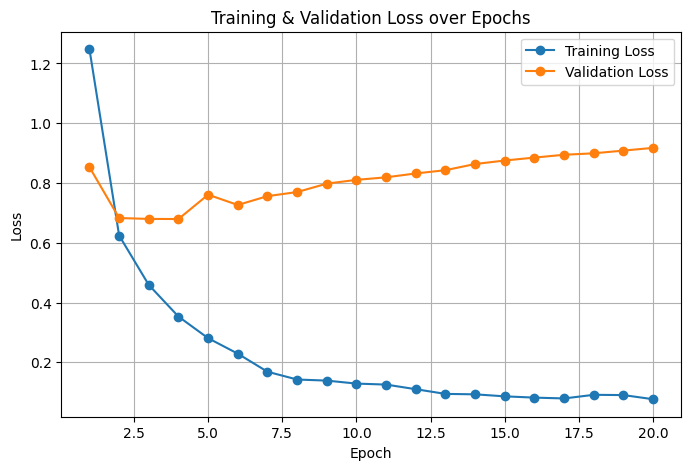

In [40]:

# --- Plot Loss Curves ---
plt.figure(figsize=(8,5))
plt.plot(range(1, EPOCHS+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, EPOCHS+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
